# Linear Regression

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


/home/ahmedalanasweh/linear-regression/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## salar based on year exerinene

In [2]:
data = pd.read_csv("Car_Purchasing_Data.csv")

In [3]:
data.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [5]:
X = data["Age"].values

In [6]:
X

array([42, 41, 43, 58, 57, 57, 47, 50, 47, 43, 50, 53, 44, 48, 55, 53, 45,
       48, 52, 59, 52, 48, 46, 47, 40, 53, 28, 56, 46, 40, 33, 40, 51, 51,
       46, 51, 50, 22, 51, 48, 42, 46, 38, 39, 61, 55, 42, 51, 41, 40, 41,
       56, 46, 37, 52, 57, 34, 43, 50, 42, 42, 42, 55, 53, 53, 43, 55, 43,
       57, 52, 45, 56, 41, 48, 56, 47, 53, 57, 39, 45, 33, 44, 40, 40, 37,
       40, 44, 43, 58, 32, 50, 59, 42, 50, 53, 47, 46, 43, 49, 43, 53, 36,
       30, 37, 48, 44, 42, 50, 30, 42, 46, 55, 44, 58, 42, 57, 43, 35, 43,
       35, 34, 48, 53, 47, 54, 51, 59, 49, 51, 40, 53, 45, 45, 37, 43, 48,
       49, 48, 45, 43, 62, 46, 51, 44, 57, 60, 39, 61, 50, 37, 45, 50, 32,
       34, 45, 50, 51, 53, 34, 56, 57, 48, 40, 50, 47, 39, 36, 44, 47, 33,
       42, 47, 40, 54, 38, 40, 45, 51, 38, 34, 50, 42, 33, 56, 57, 37, 51,
       63, 53, 51, 48, 41, 39, 45, 70, 51, 51, 42, 50, 40, 44, 52, 41, 57,
       54, 50, 37, 52, 43, 52, 64, 51, 55, 47, 36, 39, 45, 47, 47, 60, 59,
       36, 47, 38, 42, 33

In [7]:
Y=  data["Car Purchase Amount"].values

In [8]:
Y

array([35321.45877, 45115.52566, 42925.70921, 67422.36313, 55915.46248,
       56611.99784, 28925.70549, 47434.98265, 48013.6141 , 38189.50601,
       59045.51309, 42288.81046, 28700.0334 , 49258.87571, 49510.03356,
       53017.26723, 41814.72067, 43901.71244, 44633.99241, 54827.52403,
       51130.95379, 43402.31525, 47240.86004, 46635.49432, 45078.40193,
       44387.58412, 37161.55393, 49091.97185, 58350.31809, 43994.35972,
       17584.56963, 44650.36073, 66363.89316, 53489.46214, 39810.34817,
       51612.14311, 38978.67458, 10092.22509, 35928.52404, 54823.19221,
       45805.67186, 41567.47033, 28031.20985, 27815.73813, 68678.4352 ,
       68925.09447, 34215.7615 , 37843.46619, 37883.24231, 48734.35708,
       27187.23914, 63738.39065, 48266.75516, 46381.13111, 31978.9799 ,
       48100.29052, 47380.91224, 41425.00116, 38147.81018, 32737.80177,
       37348.13737, 47483.85316, 49730.53339, 40093.61981, 42297.5062 ,
       52954.93121, 48104.11184, 43680.91327, 52707.96816, 49392

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=17)

In [10]:
x_train

array([57, 44, 40, 57, 48, 44, 34, 43, 42, 58, 40, 47, 52, 53, 58, 33, 53,
       49, 45, 45, 57, 60, 45, 33, 44, 37, 41, 57, 57, 35, 43, 64, 29, 44,
       54, 44, 46, 47, 45, 33, 53, 55, 37, 38, 45, 44, 47, 46, 53, 58, 49,
       44, 41, 53, 45, 57, 56, 70, 39, 55, 51, 61, 30, 27, 54, 49, 42, 36,
       47, 53, 53, 36, 57, 46, 43, 45, 36, 48, 43, 59, 57, 43, 46, 43, 51,
       63, 60, 41, 46, 45, 43, 35, 52, 39, 55, 42, 48, 48, 51, 43, 42, 49,
       45, 63, 42, 44, 52, 42, 47, 47, 31, 50, 46, 40, 43, 43, 57, 44, 39,
       37, 43, 22, 53, 37, 62, 41, 53, 48, 51, 43, 34, 62, 53, 51, 43, 52,
       42, 42, 41, 51, 40, 42, 39, 30, 41, 37, 47, 43, 39, 50, 34, 43, 48,
       42, 48, 41, 42, 44, 47, 51, 58, 43, 52, 51, 61, 42, 51, 60, 54, 47,
       61, 50, 62, 43, 42, 40, 62, 35, 43, 35, 46, 33, 41, 50, 44, 52, 47,
       38, 50, 47, 44, 29, 49, 20, 46, 57, 55, 53, 46, 40, 51, 47, 47, 35,
       32, 47, 48, 50, 46, 36, 48, 45, 45, 44, 38, 40, 43, 40, 32, 47, 59,
       42, 40, 49, 49, 37

In [11]:
y_train

array([52707.96816, 41575.34739, 39975.43302, 51683.60859, 42919.5196 ,
       48052.65091, 22630.25982, 29754.66271, 54973.02495, 54606.18769,
       30394.82494, 60526.97788, 43264.04965, 44387.58412, 51941.6756 ,
       38399.46139, 59416.18101, 47869.82593, 52709.08196, 42369.64247,
       53655.53859, 69669.47402, 41814.72067, 27625.44144, 45738.3343 ,
       30667.60927, 42774.35579, 56973.18105, 47715.96049, 27586.20078,
       50702.18103, 55125.93237, 21471.11367, 35438.80549, 54755.42038,
       39135.03023, 58350.31809, 45271.46081, 41221.24918, 38182.30465,
       42297.5062 , 59538.40327, 40077.57289, 56457.74038, 44846.68557,
       57306.32866, 45107.22566, 46054.60253, 60865.76396, 67422.36313,
       52240.72866, 45167.32542, 48901.44342, 41357.17897, 27810.21814,
       55915.46248, 59984.16361, 47009.57741, 37364.23474, 49730.53339,
       45857.75365, 63868.94051, 27586.71854, 29670.83337, 49442.12107,
       52889.56257, 36543.93642, 37744.54285, 44577.44829, 42288

In [12]:
x_test

array([48, 32, 43, 54, 56, 39, 53, 50, 47, 56, 38, 56, 49, 33, 45, 48, 37,
       42, 52, 55, 52, 54, 49, 51, 51, 50, 62, 25, 52, 54, 40, 55, 45, 56,
       45, 41, 43, 49, 50, 43, 32, 47, 42, 54, 53, 35, 43, 39, 40, 42, 54,
       37, 47, 48, 45, 43, 32, 45, 51, 44, 38, 53, 51, 45, 51, 45, 49, 63,
       39, 53, 51, 50, 39, 51, 35, 43, 38, 47, 57, 49, 38, 33, 41, 48, 46,
       32, 48, 48, 54, 38, 53, 53, 52, 58, 51, 55, 38, 43, 52, 56])

In [13]:
y_test

array([56579.90338, 37947.85125, 45824.5656 , 48300.02057, 37714.31659,
       38243.06228, 52570.36517, 38147.81018, 39270.57909, 58045.56257,
       31249.98803, 66648.25077, 41769.38288, 24184.07443, 43401.56612,
       41913.53713, 46381.13111, 42704.3221 , 31978.9799 , 49510.03356,
       34922.42846, 57430.76903, 47693.23482, 47984.42062, 48955.85816,
       38763.11306, 50539.90169,  9000.     , 64188.26862, 52116.90791,
       30736.5798 , 66888.93694, 55420.56668, 49373.37555, 49348.88394,
       37883.24231, 41327.16554, 49991.60697, 34642.6024 , 39503.38829,
       22599.45863, 49079.29461, 39331.20127, 44525.02085, 51551.67997,
       22091.11839, 42187.6828 , 23517.91983, 43994.35972, 38901.60925,
       64147.28888, 41489.64123, 40004.87142, 31083.70271, 52983.89411,
       33131.52734, 36367.18452, 41265.52929, 63248.76188, 41456.68097,
       28733.68779, 60567.18837, 51612.14311, 39766.64804, 44418.60955,
       30841.00154, 51730.17434, 42978.34626, 46389.50237, 54075

## let's create the linear regression  model

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train.reshape(-1, 1),y_train)

LinearRegression()

In [16]:
model

LinearRegression()

## predict output based on regression  odel

In [17]:
y_predict = model.predict(x_test.reshape(-1,1))

In [18]:
y_predict

array([45827.5178972 , 32461.3808859 , 41650.60008117, 50839.81927643,
       52510.58640284, 38309.06582834, 50004.43571322, 47498.28502361,
       44992.13433399, 52510.58640284, 37473.68226514, 52510.58640284,
       46662.9014604 , 33296.76444911, 43321.36720758, 45827.5178972 ,
       36638.29870193, 40815.21651796, 49169.05215002, 51675.20283964,
       49169.05215002, 50839.81927643, 46662.9014604 , 48333.66858681,
       48333.66858681, 47498.28502361, 57522.88778208, 26613.69594346,
       49169.05215002, 50839.81927643, 39144.44939155, 51675.20283964,
       43321.36720758, 52510.58640284, 43321.36720758, 39979.83295476,
       41650.60008117, 46662.9014604 , 47498.28502361, 41650.60008117,
       32461.3808859 , 44992.13433399, 40815.21651796, 50839.81927643,
       50004.43571322, 34967.53157552, 41650.60008117, 38309.06582834,
       39144.44939155, 40815.21651796, 50839.81927643, 36638.29870193,
       44992.13433399, 45827.5178972 , 43321.36720758, 41650.60008117,
      

In [19]:
y_test

array([56579.90338, 37947.85125, 45824.5656 , 48300.02057, 37714.31659,
       38243.06228, 52570.36517, 38147.81018, 39270.57909, 58045.56257,
       31249.98803, 66648.25077, 41769.38288, 24184.07443, 43401.56612,
       41913.53713, 46381.13111, 42704.3221 , 31978.9799 , 49510.03356,
       34922.42846, 57430.76903, 47693.23482, 47984.42062, 48955.85816,
       38763.11306, 50539.90169,  9000.     , 64188.26862, 52116.90791,
       30736.5798 , 66888.93694, 55420.56668, 49373.37555, 49348.88394,
       37883.24231, 41327.16554, 49991.60697, 34642.6024 , 39503.38829,
       22599.45863, 49079.29461, 39331.20127, 44525.02085, 51551.67997,
       22091.11839, 42187.6828 , 23517.91983, 43994.35972, 38901.60925,
       64147.28888, 41489.64123, 40004.87142, 31083.70271, 52983.89411,
       33131.52734, 36367.18452, 41265.52929, 63248.76188, 41456.68097,
       28733.68779, 60567.18837, 51612.14311, 39766.64804, 44418.60955,
       30841.00154, 51730.17434, 42978.34626, 46389.50237, 54075

##  calculate accuracy

In [20]:
train_accuracy = model.score(x_train.reshape(-1,1),y_train)

In [21]:
train_accuracy

0.39556282502913453

In [22]:
test_accuracy = model.score(x_test.reshape(-1,1),y_test)

In [23]:
test_accuracy

0.42112084786817094

## give specifi year of experience how much money you will make 

In [24]:
import numpy as np
new_data=np.array([6]).reshape(-1,1)

In [25]:
new_data

array([[6]])

In [26]:
model.predict(new_data)

array([10741.40824255])

## plottimg

Text(0.5, 1.0, 'car purchasing data')

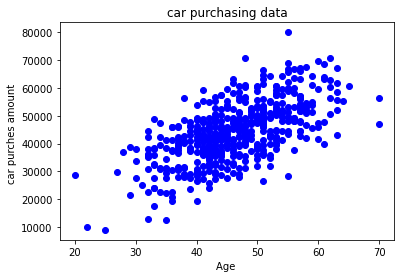

In [30]:
plt.scatter(X,Y,color='blue')
plt.xlabel('Age ')
plt.ylabel('car purches amount ')
plt.title('car purchasing data')

Text(0.5, 1.0, 'actual vs predicted data')

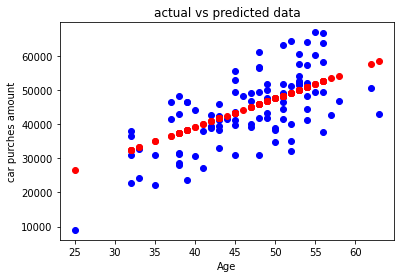

In [31]:
plt.scatter(x_test,y_test,color='blue')
plt.scatter(x_test,y_predict,color='red')
plt.xlabel('Age')
plt.ylabel('car purches amount')
plt.title('actual vs predicted data')

Text(0.5, 1.0, 'salary vs predicted data')

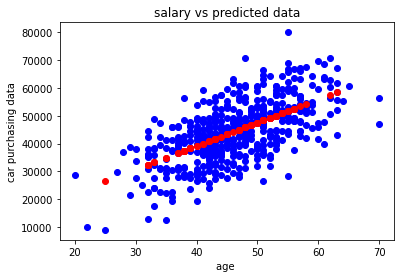

In [32]:
plt.scatter(X,Y,color='blue')
plt.scatter(x_test,y_predict,color='red')
plt.xlabel('age ')
plt.ylabel('car purchasing data')
plt.title('salary vs predicted data')